In [640]:
#Imports all the necessary packages

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
% matplotlib inline

In [641]:
#Opens file in read mode
f = open('/Users/dylanhilligoss/vh1/tdsw1.init', 'r')

#Creates a variable consisting of the first line (header)
header = f.readline()

#Loads file in way where we can manipulate specific values 
X1 = np.loadtxt('/Users/dylanhilligoss/vh1/tdsw1.init',skiprows=1)
X = np.asarray(X1).T

#print(header)

In [642]:
#Identifies corresponding columns
Radius = X[1]
R1=Radius+1
Velocity = X[2]
Density = X[3]

#Modifies Velocity and Density columns so they consist of random numbers within 1 std of the original value. 
MVelocity = Velocity*(1+0.2*np.random.randn(len(Velocity)))
#print(len(MVelocity))
MDensity = Density*(1+0.2*np.random.randn(len(Density)))

<Figure size 360x360 with 0 Axes>

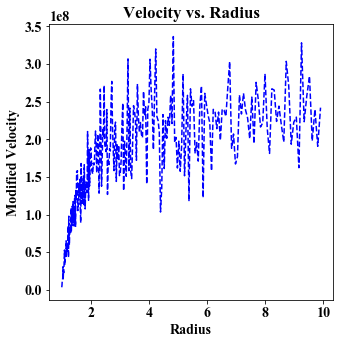

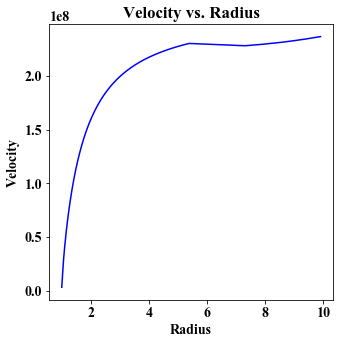

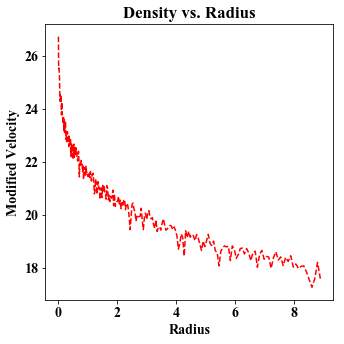

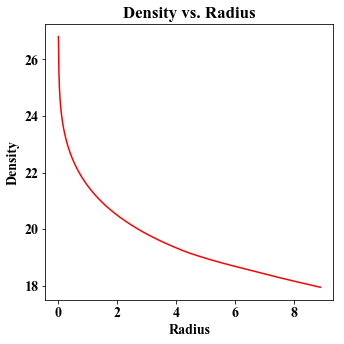

In [643]:
#Plots the figures with their new velocity and density values. Then compares them to those of the original file

fig=plt.figure(figsize=(5,5))
plt.rcParams.update({'font.size':14, 'font.family':'Times new roman'})

fig=plt.figure(figsize=(5,5))
plt.plot(R1,MVelocity, color='b', ls='--')
plt.title("Velocity vs. Radius")
plt.ylabel("Modified Velocity")
plt.xlabel("Radius")
plt.tight_layout()

fig=plt.figure(figsize=(5,5))
plt.plot(R1,Velocity, color='b', ls='-')
plt.title("Velocity vs. Radius")
plt.ylabel("Velocity")
plt.xlabel("Radius")
plt.tight_layout()

fig=plt.figure(figsize=(5,5))
plt.plot(Radius, np.log(MDensity), color='r',ls='--')
plt.title("Density vs. Radius")
plt.xlabel("Radius")
plt.ylabel("Modified Velocity")
plt.tight_layout()

fig=plt.figure(figsize=(5,5))
plt.plot(Radius, np.log(Density), color='r',ls='-')
plt.title("Density vs. Radius")
plt.xlabel("Radius")
plt.ylabel("Density")
plt.tight_layout()

In [644]:
#Opens the file in read mode
f = open('/Users/dylanhilligoss/vh1/tdsw1.init', 'r')

#Identifies the header
header = f.readline()

#Closes the file
f.close()

#Loads the file 
dat = (np.loadtxt('/Users/dylanhilligoss/vh1/tdsw1.init',skiprows=1))
#print(len(dat[:,2]))

#Changes the values in columns 2 and 3 to MVelocity and MDensity respectively
dat[:,2] = MVelocity
dat[:,3]=MDensity

#Updates and saves the new values and into the file with an integer format for the first column and  exponential format for the rest
fin = np.savetxt('/Users/dylanhilligoss/vh1/tdsw1MD.init',dat, fmt="%i %1.6e %1.6e %1.6e %1.6e %1.6e %1.6e %1.6e %1.6e %1.6e")

#Opens the file in read/update mode
#Then reads the file and finds the first position
#Then writes in the new values at the corresponding correct locations byt stripping trailing values
#Finally we close the file
with open('/Users/dylanhilligoss/vh1/tdsw1MD.init','r+') as f1:
    content = f1.read()
    f1.seek(0, 0)
    f1.write(header.rstrip('\r\n') + '\n' + content)
f1.close()